In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.nn import Linear, Sigmoid

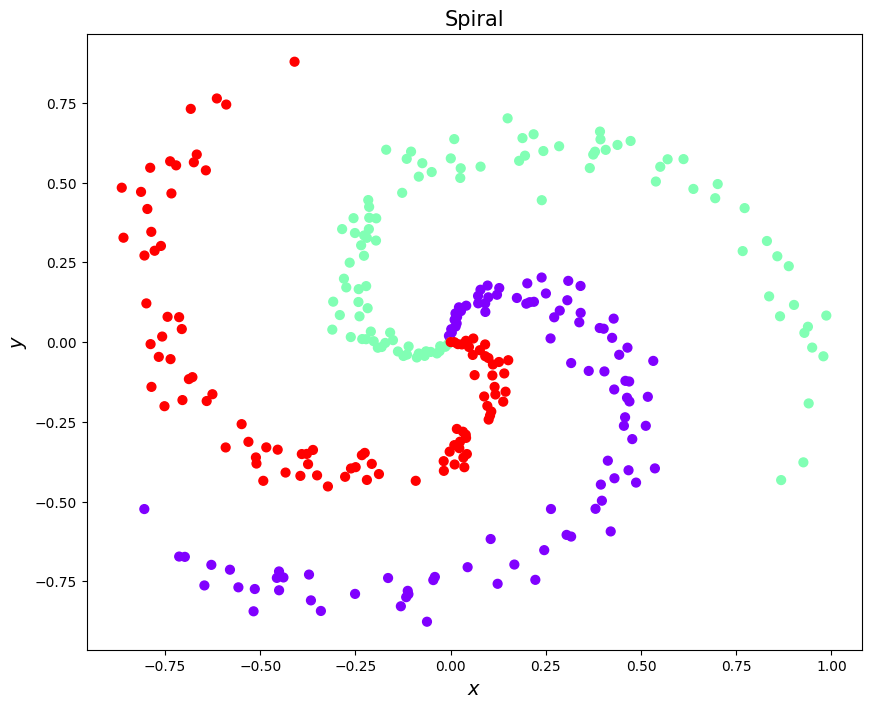

In [154]:
N = 100
D = 2
K = 3

X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)
plt.title('Spiral', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()

In [155]:
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.LongTensor(y.astype(np.int64)))

In [160]:
N = 64
D_in = 2
H = 100
D_out = 3

two_layer_net = torch.nn.Sequential(torch.nn.Linear(D_in, H), torch.nn.ReLU(), torch.nn.Linear(H, D_out),)

loss_fn = torch.nn.CrossEntropyLoss(reduction='mean')
learning_rate = 1e-3
optimizer = torch.optim.SGD(two_layer_net.parameters(), lr=learning_rate)

for t in range(500):
    y_pred = two_layer_net(X)
    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 1.1213818788528442
1 1.121094822883606
2 1.1208081245422363
3 1.1205222606658936
4 1.1202367544174194
5 1.1199519634246826
6 1.1196677684783936
7 1.1193840503692627
8 1.1191009283065796
9 1.1188184022903442
10 1.1185364723205566
11 1.1182548999786377
12 1.1179741621017456
13 1.1176937818527222
14 1.1174139976501465
15 1.1171348094940186
16 1.1168560981750488
17 1.1165777444839478
18 1.116300106048584
19 1.1160231828689575
20 1.1157466173171997
21 1.1154705286026
22 1.1151950359344482
23 1.1149202585220337
24 1.1146456003189087
25 1.114371657371521
26 1.1140981912612915
27 1.1138254404067993
28 1.1135528087615967
29 1.1132808923721313
30 1.1130096912384033
31 1.1127387285232544
32 1.1124684810638428
33 1.1121984720230103
34 1.1119290590286255
35 1.1116602420806885
36 1.1113919019699097
37 1.111124038696289
38 1.1108566522598267
39 1.1105897426605225
40 1.110323190689087
41 1.1100572347640991
42 1.1097917556762695
43 1.1095267534255981
44 1.1092621088027954
45 1.10899817943573
46 1.108

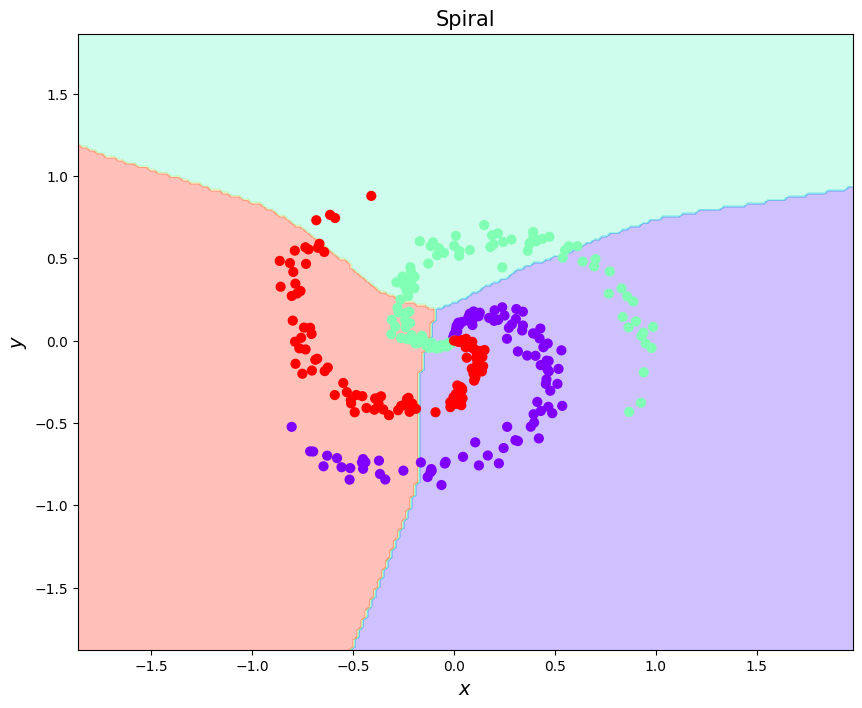

In [161]:
h = 0.02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = two_layer_net(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Spiral', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()

In [136]:
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.LongTensor(y.astype(np.int64)))

In [163]:
N = 64
D_in = 2
H = 100
D_out = 3

better_net = torch.nn.Sequential(
torch.nn.Linear(D_in, H),
torch.nn.ReLU(),
torch.nn.Linear(H, H),
torch.nn.ReLU(),
torch.nn.Linear(H, H),
torch.nn.ReLU(),
torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.CrossEntropyLoss(reduction='mean')
learning_rate = 0.9
optimizer = torch.optim.SGD(better_net.parameters(), lr=learning_rate)

for t in range(1000):
    y_pred = better_net(X)
    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 1.0990368127822876
1 1.0835920572280884
2 1.0696220397949219
3 1.0529325008392334
4 1.0313814878463745
5 1.0037550926208496
6 0.9674391746520996
7 0.9211231470108032
8 0.8689289093017578
9 0.8300357460975647
10 1.0662153959274292
11 1.9097459316253662
12 1.2017196416854858
13 1.0839110612869263
14 1.054572582244873
15 1.0176831483840942
16 0.9889464378356934
17 0.9620257616043091
18 0.9356803297996521
19 0.907819926738739
20 0.8760474920272827
21 0.845649003982544
22 0.8476592898368835
23 1.0890446901321411
24 0.9167155027389526
25 0.9669992327690125
26 0.7803630828857422
27 0.727789580821991
28 0.6857267022132874
29 0.6631786823272705
30 0.7011550068855286
31 1.0923694372177124
32 1.0679179430007935
33 0.8456149697303772
34 0.702939510345459
35 0.6475363373756409
36 0.6093877553939819
37 0.5791796445846558
38 0.5973018407821655
39 0.921420156955719
40 0.9366609454154968
41 0.8670448064804077
42 0.716704249382019
43 0.6297269463539124
44 0.6058975458145142
45 0.6393979787826538
46 0.

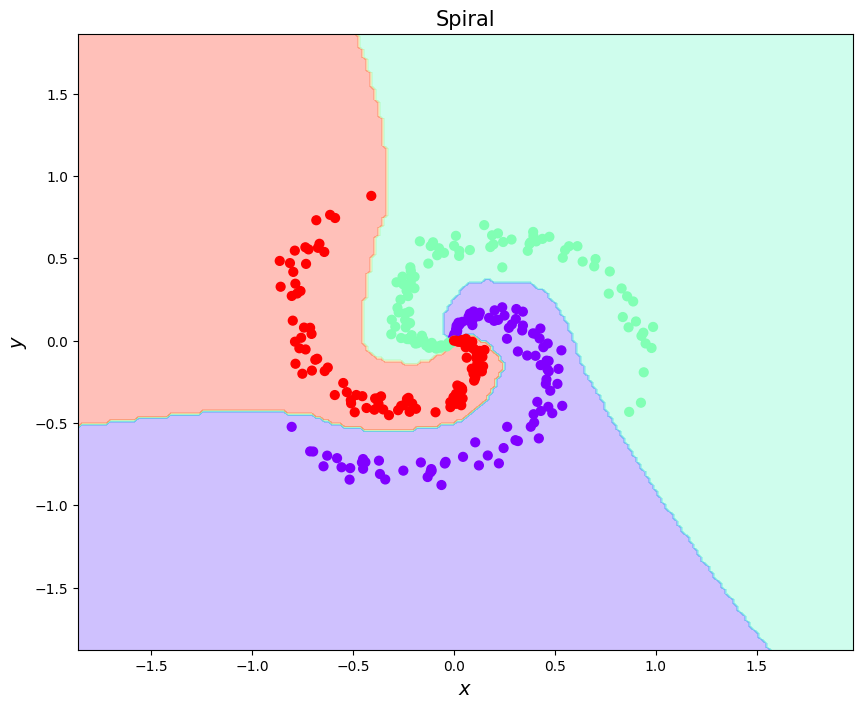

In [165]:
h = 0.02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = better_net(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Spiral', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()